In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import json
import sys
sys.path.append("..")
from solvers.aco.aco_solver import AntColonyOptSolver
from problem.sudoku_manager import Sudoku, generate_boards
from time import perf_counter
from statistics import mean

: 

In [1]:
params = {
  "seed": 14,
  "test_id": 1,
  "start_id": 10,
  "num_of_runs": 5,
  "num_of_sudokus": 5,
  "sudoku_level": "easy",
  "max_epoch": 1000,
  "greed_factor": 0.9,
  "local_pher_factor": 0.15,
  "global_pher_factor": 0.8,
  "evaporation": 0.005,
  "ants_count": 81
}

In [3]:
sudokus_range = range(params["start_id"], params["start_id"] + params["num_of_sudokus"])

if params["sudoku_level"] == "easy:"
    sudokus = [Sudoku('easy', id) for id in sudokus_range]
elif params["sudoku_level"] == "medium":
    sudokus = [Sudoku('medium', id) for id in sudokus_range]
else:
    sudokus = [Sudoku('hard', id) for id in sudokus_range]

In [4]:
solver = AntColonyOptSolver(
    max_epoch=params['max_epoch'],
    greed_factor=params['greed_factor'],
    local_pher_factor=params['local_pher_factor'],
    global_pher_factor=params['global_pher_factor'],
    evaporation=params['evaporation'],
    seed=params['seed']
)

In [5]:
def test_ga_solver(solver, sudokus):
    solutions_list = []
    best_scores_list = []
    best_per_iters = []
    ants_moves_list = []
    exec_times = []
    for i in range(params['num_of_sudokus']):
        print(f"{sudokus[i].board}\n")
        for j in range(params['num_of_runs']):
            start_time = perf_counter()
            results = solver.solve(sudoku=sudokus[i], ants_count=params['ants_count'])
            exec_times.append(perf_counter() - start_time)
            solutions_list.append(results[0])
            best_scores_list.append(results[1])
            best_per_iters.append(results[2])
            ants_moves_list.append(results[3])
    return solutions_list, best_scores_list, best_per_iters, ants_moves_list, exec_times

In [6]:
solutions, best_scores, best_per_iters, ants_moves_list, exec_times = test_ga_solver(solver, sudokus)

[[0 7 0 1 0 0 0 2 0]
 [8 5 2 9 3 4 1 6 0]
 [3 1 6 8 2 7 9 4 5]
 [1 2 3 4 0 9 5 7 0]
 [0 8 4 6 7 0 2 1 0]
 [5 6 7 0 1 0 0 9 0]
 [2 9 5 7 0 8 6 0 0]
 [6 4 8 3 9 1 7 5 0]
 [0 3 1 5 6 2 0 0 0]]

empty chrom: [[0 7 0 1 0 0 0 2 0]
 [8 5 2 9 3 4 1 6 0]
 [3 1 6 8 2 7 9 4 5]
 [1 2 3 4 0 9 5 7 0]
 [0 8 4 6 7 0 2 1 0]
 [5 6 7 0 1 0 0 9 0]
 [2 9 5 7 0 8 6 0 0]
 [6 4 8 3 9 1 7 5 0]
 [0 3 1 5 6 2 0 0 0]]
{(0, 0): {4, 8, 9}, (0, 2): {6, 9}, (0, 4): {3, 5}, (0, 5): {3, 5, 6}, (0, 6): {3, 4, 8}, (0, 8): {3, 4, 8}, (1, 0): {8}, (1, 4): {3}, (1, 8): {3, 7, 8}, (2, 1): {1}, (2, 2): {6}, (2, 4): {2}, (2, 7): {4}, (3, 3): {4}, (3, 4): {4, 8}, (3, 5): {9}, (3, 8): {4, 6, 8}, (4, 0): {8, 9}, (4, 1): {8}, (4, 5): {3, 5, 9}, (4, 8): {3, 8}, (5, 2): {7}, (5, 3): {2, 4}, (5, 5): {2, 3}, (5, 6): {3, 4, 8}, (5, 8): {3, 4, 8}, (6, 0): {2}, (6, 2): {5}, (6, 4): {2, 4}, (6, 7): {3, 4}, (6, 8): {1, 2, 3, 4}, (7, 6): {7}, (7, 8): {2, 7}, (8, 0): {2, 7}, (8, 1): {3}, (8, 5): {2}, (8, 6): {3, 4, 7, 8}, (8, 7): {3, 4, 8}, 

In [ ]:
MAX_STEPS = max([len(bests) for bests in best_per_iters])

In [7]:
def normalize_arr(arr):
    if arr.shape[0] == MAX_STEPS:
      return arr
    else:
      norm_arr = np.zeros((MAX_STEPS,))
      norm_arr[:len(arr)] = arr
      norm_arr[len(arr):] = max(arr)
      return norm_arr

In [8]:
def normalize_best_per_iters(best_per_iters):
    best_iters_avg = []
    best_iters_max = []
    best_iters_min = []
    normalized_best_iters = np.array([normalize_arr(bests) for bests in best_per_iters])
    for i in range(normalized_best_iters.shape[1]):
        best_iters_avg.append(mean(normalized_best_iters[:, i]))
        best_iters_max.append(max(normalized_best_iters[:, i]))
        best_iters_min.append(min(normalized_best_iters[:, i]))
    return best_iters_avg, best_iters_max, best_iters_min

In [9]:
best_per_iters_avg, best_per_iters_max, best_per_iters_min = normalize_best_per_iters(best_per_iters)

In [10]:
avg_best_score = mean(best_scores)
avg_best_score

243

In [ ]:
avg_ants_moves = mean(ants_moves_list)
avg_ants_moves

In [11]:
avg_exec_time = mean(exec_times)
avg_exec_time

14.579981574999998

In [12]:
params_text = "max_epoch={}, greed_factor={}, local_pher_f={}, global_pher_f={}, evaporation={}, ants_count={}".format(
                params["max_epoch"],
                params["greed_factor"],
                params["local_pher_factor"],
                params["global_pher_factor"],
                params["evaporation"],
                params["ants_count"]
            )

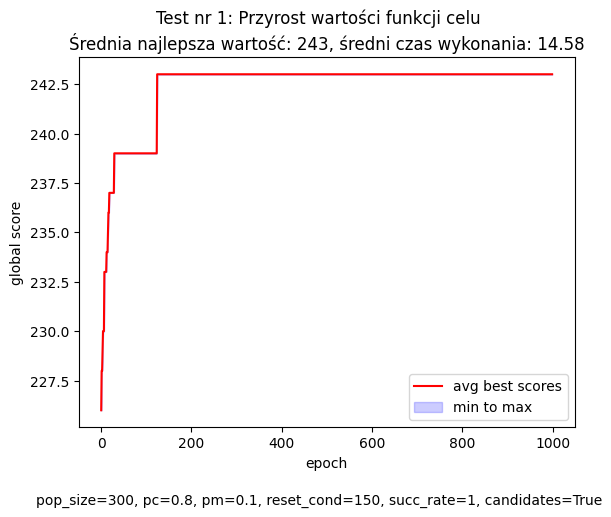

In [18]:
plt.figure()
plt.fill_between(range(MAX_STEPS), best_per_iters_min, best_per_iters_max, color='b', alpha=0.2, label='min to max')
plt.plot(range(MAX_STEPS), (best_per_iters_avg), 'r', label='avg best scores')
plt.legend(loc='lower right')
plt.xlabel('epoch')
plt.ylabel('global score')
plt.suptitle('Test nr {}: Przyrost wartości funkcji celu'.format(params['test_id']))
plt.title('Średnia najlepsza wartość: {}, średni czas wykonania: {:.2f}'.format(avg_best_score, avg_exec_time))
plt.figtext(0.5, -0.05, params_text, wrap=True, horizontalalignment='center', fontsize=10)
plt.savefig("../../results/plots/aco/{}.png".format(params_text))
plt.show()

In [14]:
with open("../../results/params/aco/{}.json".format(params_text), "w") as write_file:
    json.dump(params, write_file, indent=4)